In [30]:
import pandas as pd

In [31]:
df=pd.read_excel("Crop_recommendation.xlsx",na_values=[" ?","?","? "])

In [32]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,0.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,0.000000,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,coffee
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2161 non-null   float64
 1   P            2104 non-null   float64
 2   K            2059 non-null   float64
 3   temperature  2199 non-null   float64
 4   humidity     2199 non-null   float64
 5   ph           2185 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(7), object(1)
memory usage: 137.6+ KB


In [34]:
df.isnull().sum()

N               39
P               96
K              141
temperature      1
humidity         1
ph              15
rainfall         0
label            0
dtype: int64

In [35]:
df["humidity"].nunique()

2192

In [36]:
df["K"].mode()

0    17.0
Name: K, dtype: float64

In [37]:
df["K"].fillna(17.0,inplace=True)

In [38]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2161.000000,2104.000000,2200.000000,2199.000000,2199.000000,2185.000000,2200.000000
mean,50.366960,53.672053,47.000909,25.619664,71.254084,6.470420,102.961693
std,37.173779,33.475591,50.934032,5.062358,22.614824,0.774668,55.109932
min,0.000000,0.000000,0.000000,8.825675,0.000000,3.504752,0.000000
25%,21.000000,28.000000,19.000000,22.770560,60.124723,5.972715,64.236408
50%,37.000000,52.000000,30.000000,25.600337,80.457444,6.425420,94.651497
75%,85.000000,68.000000,48.000000,28.561810,89.935793,6.924042,123.026982
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [39]:
df["P"].nunique()

115

In [40]:
df["N"].fillna(37.0,inplace=True)

In [41]:
df["P"].fillna(32.0,inplace=True)

In [42]:
df["temperature"].fillna(25.0,inplace=True)

In [43]:
df["humidity"].fillna(80.0,inplace=True)

In [44]:
df["ph"].fillna(6.0,inplace=True)

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
lb=LabelEncoder()

In [47]:
df['crop_encode']=lb.fit_transform(df["label"])

In [48]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,crop_encode
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice,20
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice,20
2,60.0,55.0,0.0,23.004459,82.320763,7.840207,263.964248,rice,20
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,0.000000,rice,20
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee,5


In [49]:
df.drop('label',axis=1).corr()

,N,P,K,temperature,humidity,ph,rainfall,crop_encode
N,1.000000,-0.229864,-0.148394,0.026949,0.178463,0.095693,0.044758,-0.034463
P,-0.229864,1.000000,0.733180,-0.124572,-0.109231,-0.131585,-0.061515,-0.482453
K,-0.148394,0.733180,1.000000,-0.164509,0.174822,-0.166381,-0.059494,-0.349745
temperature,0.026949,-0.124572,-0.164509,1.000000,0.200045,-0.019039,-0.026928,0.113516
humidity,0.178463,-0.109231,0.174822,0.200045,1.000000,-0.004627,0.088603,0.197386
ph,0.095693,-0.131585,-0.166381,-0.019039,-0.004627,1.000000,-0.107596,-0.016411
rainfall,0.044758,-0.061515,-0.059494,-0.026928,0.088603,-0.107596,1.000000,0.042314
crop_encode,-0.034463,-0.482453,-0.349745,0.113516,0.197386,-0.016411,0.042314,1.000000


In [50]:
import seaborn as sns

<Axes: >

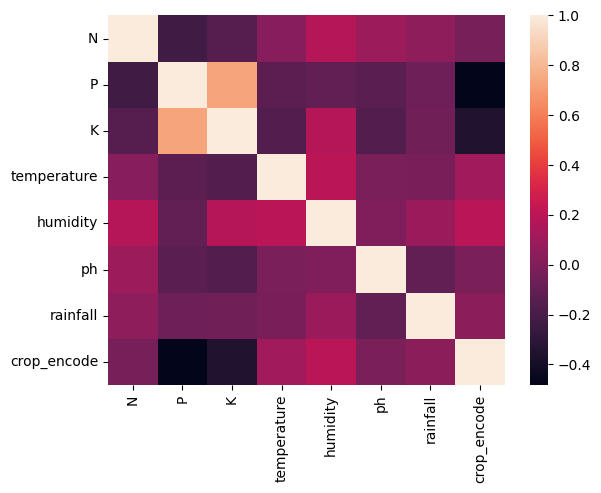

In [51]:
sns.heatmap(df.drop('label',axis=1).corr())

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
df1=df.drop('label',axis=1)

In [54]:
df1

,N,P,K,temperature,humidity,ph,rainfall,crop_encode
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,20
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,20
2,60.0,55.0,0.0,23.004459,82.320763,7.840207,263.964248,20
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,0.000000,20
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,5
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,5
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,5
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,5


In [55]:
x=df1.drop('crop_encode',axis=1)

In [56]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
2,60.0,55.0,0.0,23.004459,82.320763,7.840207,263.964248
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,0.000000
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293


In [57]:
y=df["label"]

In [58]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2529)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
lg=LogisticRegression()

In [62]:
lg.fit(x_train,y_train)

C:\Users\vaish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
lg.predict([[90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536]])

C:\Users\vaish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['rice'], dtype=object)

In [64]:
lg.score(x_test,y_test)

0.9090909090909091

In [65]:
import pickle

In [66]:
with open('model.pkl','wb') as model_file:
    pickle.dump(lg,model_file)